In [95]:
from __future__ import print_function
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_footer
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_quoting
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [83]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [84]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df = df.dropna(how="all")

In [23]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df = df[~df.duplicated()]

In [25]:
for col in df.columns:
    print(col)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [37]:
print(df.columns.values)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [30]:
print(len(df))

7043


In [40]:
categorical_features = [
 "gender",
 "SeniorCitizen",
 "Partner",
 "Dependents",
 "PhoneService",
 "MultipleLines",
 "InternetService",
 "OnlineSecurity",
 "OnlineBackup",
 "DeviceProtection",
 "TechSupport",
 "StreamingTV",
 "StreamingMovies",
 "Contract",
 "PaperlessBilling",
 "PaymentMethod"
]

In [47]:
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [46]:
df[numerical_features].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [48]:
df[numerical_features].hist(bins =30, figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12067dda0>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1221aef98>,
      dtype=object)

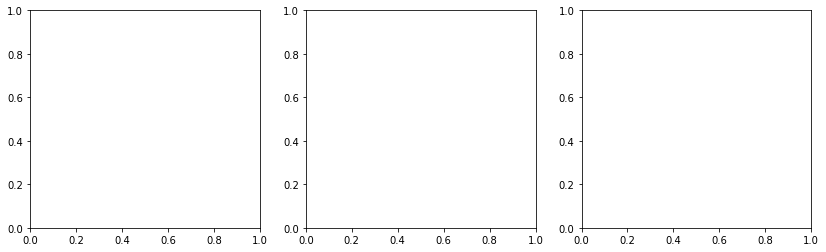

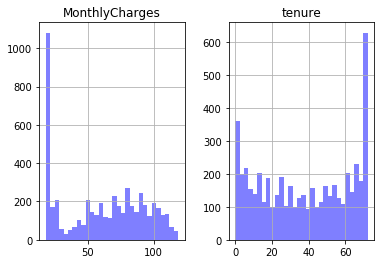

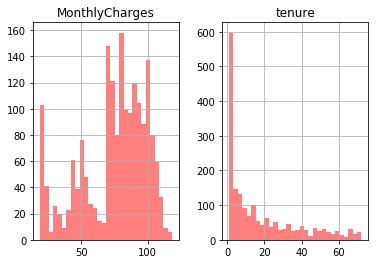

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn =="No"][numerical_features].hist(bins =30, color ="blue",alpha =0.5,ax=None)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5)

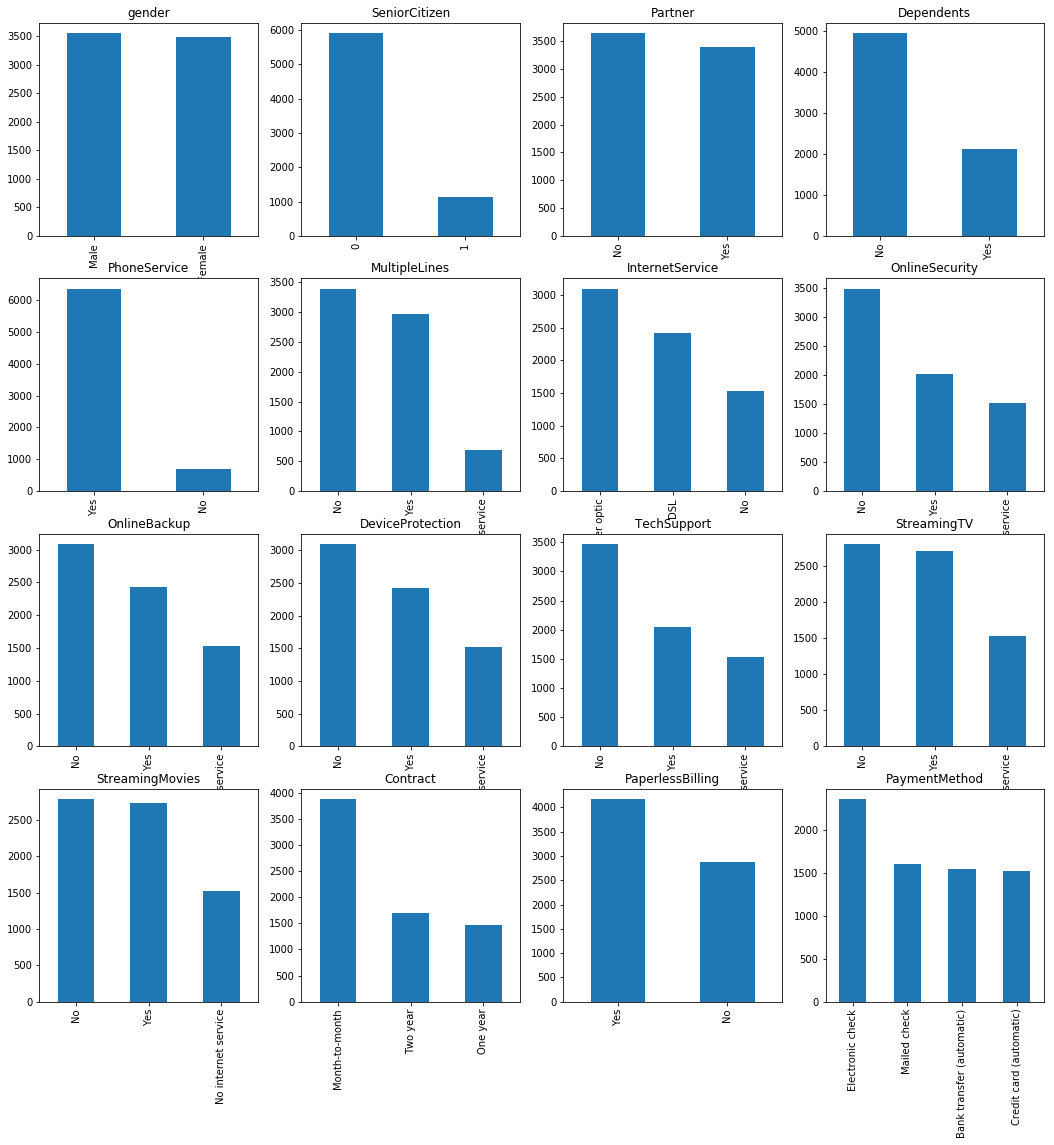

In [62]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 18))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'churned')

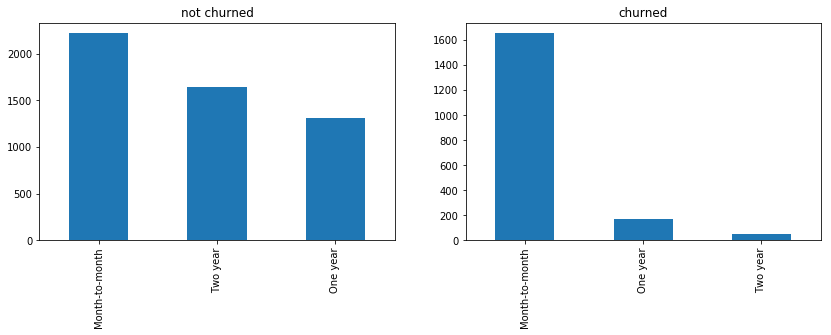

In [65]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.Churn == "No"][feature].value_counts().plot('bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot('bar', ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

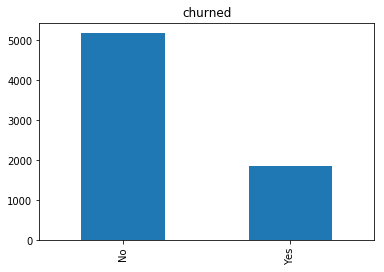

In [66]:
df[target].value_counts().plot('bar').set_title('churned')

In [98]:
pipeline = Pipeline(
    [
        (
            "union",
            FeatureUnion(
                transformer_list=[("categorical_features",
                                  Pipeline([
                                      ("selector", ItemSelector(key = categorical_feature)),
                                      ("onehot", OneHotEncoder()),
                                  ]
                                  ),
                                  )
                                 ]
                +[
                    (
                        "numerical_features",
                        Pipeline(
                        [
                            ("selector", ItemSelector(key=numerical_features)),
                            ("scalar", StandardScaler()),
                        ]
                        ),
                  
                  )
                ]
            ),
        ),("classifier", tree.DecisionTreeClassifier(max_depth=3, random_state=42)),
    ]
)

In [94]:
df_train, df_test = train_test_split(df,test_size = 0.25, random_state = 42)


In [99]:
pipeline.fit(df_train, df_train[target])
pred = pipeline.predict(df_test)

ValueError: Expected 2D array, got 1D array instead:
array=['Electronic check' 'Electronic check' 'Bank transfer (automatic)' ...
 'Electronic check' 'Electronic check' 'Credit card (automatic)'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [100]:
from sklearn.metrics import classification_report
print(classification_report(df_test[target], pred))

NameError: name 'pred' is not defined

In [97]:
class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.

    The data is expected to be stored in a 2D data structure, where the first
    index is over features and the second is over samples.  i.e.

    >> len(data[key]) == n_samples

    Please note that this is the opposite convention to scikit-learn feature
    matrixes (where the first index corresponds to sample).

    ItemSelector only requires that the collection implement getitem
    (data[key]).  Examples include: a dict of lists, 2D numpy array, Pandas
    DataFrame, numpy record array, etc.

    >> data = {'a': [1, 5, 2, 5, 2, 8],
               'b': [9, 4, 1, 4, 1, 3]}
    >> ds = ItemSelector(key='a')
    >> data['a'] == ds.transform(data)

    ItemSelector is not designed to handle data grouped by sample.  (e.g. a
    list of dicts).  If your data is structured this way, consider a
    transformer along the lines of `sklearn.feature_extraction.DictVectorizer`.

    Parameters
    ----------
    key : hashable, required
        The key corresponding to the desired value in a mappable.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]